# Lab 1

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv
from numpy.fft import fft, ifft
#from scipy.fft import fft, ifft

The $N\times N$ Fourier matrix is defined as (element-wise operation $\odot$)
\begin{equation}
\mathbf{W} = \mathrm{e}^{+\mathrm{j}\frac{2\pi}{N} \odot \mathbf{K}}
\end{equation}
using the so called twiddle factor (note that the sign in the exp() is our convention)
\begin{equation}
W_N = \mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}}
\end{equation}
and the outer product
\begin{equation}
\mathbf{K} = 
\begin{bmatrix}
0\\
1\\
2\\
\vdots\\
N-1
\end{bmatrix}
\cdot
\begin{bmatrix}
0 & 1 & 2 & \cdots & N-1
\end{bmatrix}
\end{equation}
containing all possible products $k\,\mu$ in a suitable arrangement.

For the simple case $N=4$ these matrices are
\begin{align}
\mathbf{K} = \begin{bmatrix}
0 & 0 & 0 & 0\\
0 & 1 & 2 & 3\\
0 & 2 & 4 & 6\\
0 & 3 & 6 & 9
\end{bmatrix}
\rightarrow
\mathbf{W} = \begin{bmatrix}
1 & 1 & 1 & 1\\
1 & +\mathrm{j} & -1 & -\mathrm{j}\\
1 & -1 & 1 & -1\\
1 & -\mathrm{j} & -1 & +\mathrm{j}
\end{bmatrix}
\end{align}

## Variant 14: IDFT Signal Synthesis for N=9

Let us synthesize a discrete-time signal by using the IDFT in matrix notation for $N=9$ for:


\begin{equation}
\mathbf{x}_\mu = [6, 2, 4, 3, 4, 5, 0, 0, 0]^\text{T}
\end{equation}



K-matrix:
 [[ 0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8]
 [ 0  2  4  6  8 10 12 14 16]
 [ 0  3  6  9 12 15 18 21 24]
 [ 0  4  8 12 16 20 24 28 32]
 [ 0  5 10 15 20 25 30 35 40]
 [ 0  6 12 18 24 30 36 42 48]
 [ 0  7 14 21 28 35 42 49 56]
 [ 0  8 16 24 32 40 48 56 64]]
W-matrix:
 [[ 1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j]
 [ 1.        +0.00000000e+00j  0.76604444+6.42787610e-01j
   0.17364818+9.84807753e-01j -0.5       +8.66025404e-01j
  -0.93969262+3.42020143e-01j -0.93969262-3.42020143e-01j
  -0.5       -8.66025404e-01j  0.17364818-9.84807753e-01j
   0.76604444-6.42787610e-01j]
 [ 1.        +0.00000000e+00j  0.17364818+9.84807753e-01j
  -0.93969262+3.42020143e-01j -0.5       -8.66025404e-01j
   0.76604444-6.42787610e-01j  0.76604444+6.42787610e-01j
  -0.5 

,0,1,2,3,4,5,6,7,8
0,1.0,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00
1,1.0,0.77,0.17,-0.5,-0.94,-0.94,-0.5,0.17,0.77
2,1.0,0.17,-0.94,-0.5,0.77,0.77,-0.5,-0.94,0.17
3,1.0,-0.50,-0.50,1.0,-0.50,-0.50,1.0,-0.50,-0.50
4,1.0,-0.94,0.77,-0.5,0.17,0.17,-0.5,0.77,-0.94
5,1.0,-0.94,0.77,-0.5,0.17,0.17,-0.5,0.77,-0.94
6,1.0,-0.50,-0.50,1.0,-0.50,-0.50,1.0,-0.50,-0.50
7,1.0,0.17,-0.94,-0.5,0.77,0.77,-0.5,-0.94,0.17
8,1.0,0.77,0.17,-0.5,-0.94,-0.94,-0.5,0.17,0.77


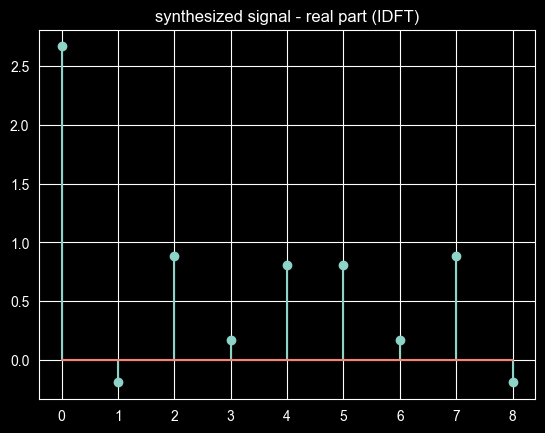

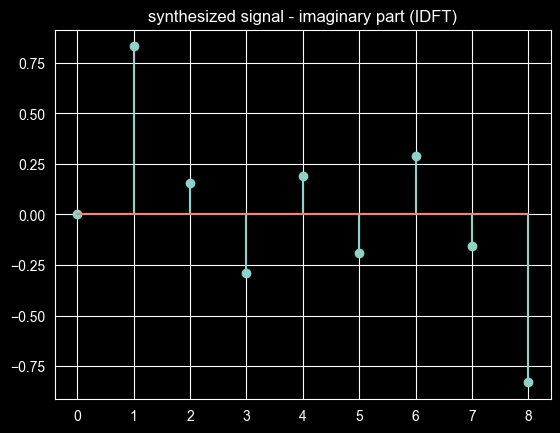

In [37]:
# input data
X_mu = np.array([6, 2, 4, 3, 4, 5, 0, 0, 0])
N = len(X_mu)

# K-matrix
k = np.arange(N)
mu = np.arange(N)
K = np.outer(k, mu)

# Matrix for IDFT
W_inv = np.exp(1j * 2 * np.pi / N * K)

# signal syntezis  x = (1/N) * W_inv * X
x_k = (1/N) * np.dot(W_inv, X_mu)

# Matrices visualization
print("K-matrix:\n",K)
print("W-matrix:\n",W_inv)
print(np.round(W_inv, 2))
df_W_real = pd.DataFrame(np.real(W_synteza).round(2))
print("\nW matrix - real part:\n:")
display(df_W_real)

plt.stem(k, np.real(x_k))
plt.title("synthesized signal - real part (IDFT)")
plt.show()

plt.stem(k, np.imag(x_k))
plt.title("synthesized signal - imaginary part (IDFT)")
plt.show()

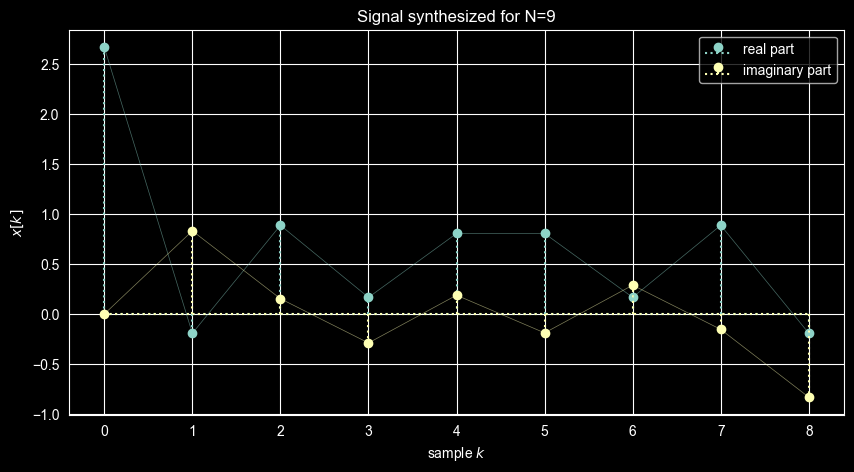

True
Mean value (DC)  (0.67+0j)


In [36]:
if N == 9:
    X_mu = np.array([6, 2, 4, 3, 4, 5, 0, 0, 0])
    # x_test = 1/N*W@X_test  # >= Python3.5
    x_test = 1/N * np.matmul(W_inv, X_mu)

    plt.figure(figsize=(10, 5))
    plt.stem(k, np.real(x_test), label='real part',
             markerfmt='C0o', basefmt='C0:', linefmt='C0:')
    plt.stem(k, np.imag(x_test), label='imaginary part',
             markerfmt='C1o', basefmt='C1:', linefmt='C1:')

    plt.plot(k, np.real(x_test), 'C0-', lw=0.5, alpha=0.5)
    plt.plot(k, np.imag(x_test), 'C1-', lw=0.5, alpha=0.5)

    plt.xlabel(r'sample $k$')
    plt.ylabel(r'$x[k]$')
    plt.title(f'Signal synthesized for N={N}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # check if results are identical with numpy ifft package
    print(np.allclose(np.fft.ifft(X_mu), x_test))
    print('Mean value (DC) ', np.mean(x_test).round(2))